# 1D Implementation and modification of ”Talent vs Luck” (TvL) model 
- 2022 Ig Novel prize winner for economics
- Title: Talent vs Luck: the role of randomness in success and failure
- Authors: A. Pluchino∗ , A. E. Biondo† , A. Rapisarda‡
- Paper link: https://arxiv.org/pdf/1802.07068.pdf

## Basic settings

In [1]:
import tqdm 
import numpy as np
from matplotlib import pyplot as plt

# define experiment constants
N = 100 # number of people
p_luck = 0.5 # percentage of luck event
town_size = 4000
starting_capital = 10

N_E = int(N/2) # number of lucky/unlucky events
N_luck = int(N_E*p_luck) # number of lucky events

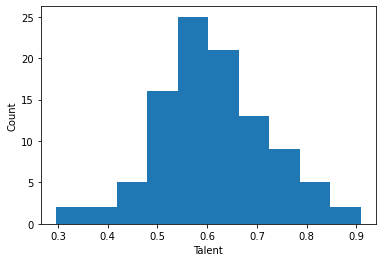

In [2]:
# define talents
talents = np.random.normal(0.6, 0.1, N)
talents[talents>0.99] = 0.99
talents[talents<0.01] = 0.01
plt.hist(talents)
plt.xlabel('Talent')
plt.ylabel('Count')
plt.show()

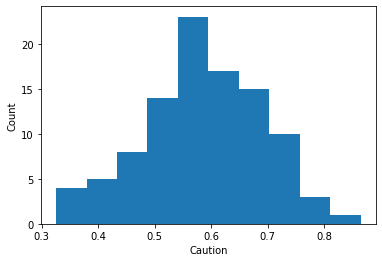

In [3]:
# define cautions: Higher caution keeps individual from unlucky events
cautions = np.random.normal(0.6, 0.1, N)
cautions[cautions>0.99] = 0.99
cautions[cautions<0.01] = 0.01
plt.hist(cautions)
plt.xlabel('Caution')
plt.ylabel('Count')
plt.show()

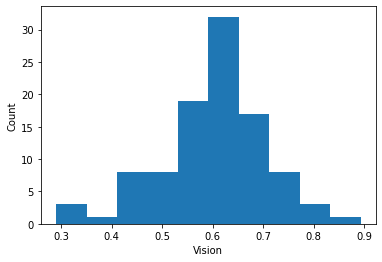

In [4]:
# define vision: Better vision allows individual to expose to more lucky events
visions = np.random.normal(0.6, 0.1, N)
visions[visions>0.99] = 0.99
visions[visions<0.01] = 0.01
plt.hist(visions)
plt.xlabel('Vision')
plt.ylabel('Count')
plt.show()

## Experiments

In [5]:
n_simulation = 10
n_iteration = 80
   
capitals = np.ones(N) * starting_capital
positions = np.random.choice(town_size, (N, 1), replace=False)

def move_events(events, town_size=201, step_size = 1):
    events += np.random.choice([-step_size, step_size], events.shape[0])
    events[events<0] += town_size
    events[events>town_size] -= town_size
    return events

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 170.06it/s]

Top 10 richest people own 0.357 of total capital in the town


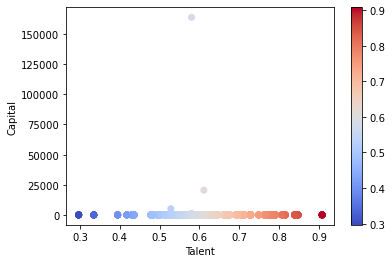

In [6]:
# Scenario 1: Different talents
for n in tqdm.tqdm(range(n_simulation), total = n_simulation):
    simulated_capitals = capitals.copy()
    events = np.random.choice(town_size, N_E, replace=False)
    lucky_events, unlucky_events = events[:N_luck], events[N_luck:]
    for iteration in range(n_iteration):
        lucky_events, unlucky_events = move_events(lucky_events), move_events(unlucky_events)
        met_unluck = np.in1d(positions, unlucky_events)
        seized_luck = np.logical_and(np.in1d(positions, lucky_events), talents > np.random.random(N))
        simulated_capitals[met_unluck] /= 2
        simulated_capitals[seized_luck] *= 2
    plt.scatter(talents, simulated_capitals, c=talents, cmap = 'coolwarm')
    
sorted_capitals = sorted(list(simulated_capitals))
print ('Top 10 richest people own %.3f of total capital in the town' % (sum(sorted_capitals[-10:])/sum(sorted_capitals))) 
plt.xlabel('Talent')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 159.26it/s]

Top 10 richest people own 0.282 of total capital in the town


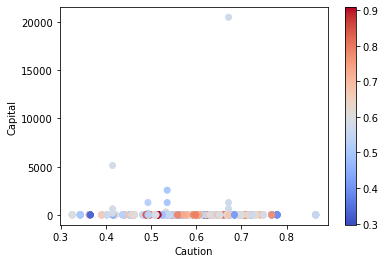

In [7]:
# Scenario 2: Different talent and incaution
for n in tqdm.tqdm(range(n_simulation), total = n_simulation):
    simulated_capitals = capitals.copy()
    events = np.random.choice(town_size, N_E, replace=False)
    lucky_events, unlucky_events = events[:N_luck], events[N_luck:]
    for iteration in range(n_iteration):
        lucky_events, unlucky_events = move_events(lucky_events), move_events(unlucky_events)
        met_unluck = np.logical_and(np.in1d(positions, unlucky_events), cautions < np.random.random(N))
        seized_luck = np.logical_and(np.in1d(positions, lucky_events), talents > np.random.random(N))
        simulated_capitals[met_unluck] /= 2
        simulated_capitals[seized_luck] *= 2
        
    plt.scatter(cautions, simulated_capitals, c=talents, cmap = 'coolwarm')
    
sorted_capitals = sorted(list(simulated_capitals))
print ('Top 10 richest people own %.3f of total capital in the town' % (sum(sorted_capitals[-10:])/sum(sorted_capitals)))
plt.xlabel('Caution')
plt.ylabel('Capital')
plt.colorbar()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.34it/s]

Top 10 richest people own 1.000 of total capital in the town


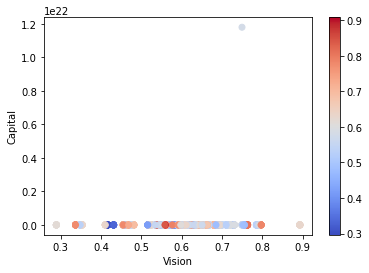

In [8]:
# Scenario 3: Different talent and vision

vision_window = 10
for n in tqdm.tqdm(range(n_simulation), total = n_simulation):
    simulated_capitals = capitals.copy()
    events = np.random.choice(town_size, N_E, replace=False)
    lucky_events, unlucky_events = events[:N_luck], events[N_luck:]
    for iteration in range(n_iteration):
        lucky_events, unlucky_events = move_events(lucky_events), move_events(unlucky_events)
        met_unluck = np.in1d(positions, unlucky_events)
        seized_luck = np.in1d(positions, -1)
        for x in np.arange(-vision_window, vision_window):
            vision_luck = np.logical_and(np.in1d(positions+x, lucky_events), talents > np.random.random(N))
            vision_luck = np.logical_and(vision_luck, visions > (abs(x)/vision_window-0.1))
            seized_luck = np.logical_or(vision_luck, seized_luck)
#             simulated_capitals[vision_luck] *= 2
        
        simulated_capitals[met_unluck] /= 2
        simulated_capitals[seized_luck] *= 2
        
    plt.scatter(visions, simulated_capitals, c=talents, cmap = 'coolwarm')
    
sorted_capitals = sorted(list(simulated_capitals))
print ('Top 10 richest people own %.3f of total capital in the town' % (sum(sorted_capitals[-10:])/sum(sorted_capitals)))
plt.xlabel('Vision')
plt.ylabel('Capital')
plt.colorbar()
plt.show()